In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty charts
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('/content/FDI data.csv')
print(df.head())
print(df.info())

                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [3]:
# Example renaming (if needed)
df.columns = df.columns.str.strip()

# Replace commas and convert to numeric
for col in df.columns[1:]:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

# Melt year columns into a single 'Year' column for time-series analysis
df_melted = df.melt(id_vars=['Sector'], var_name='Year', value_name='FDI_Cr')

# Convert year to consistent format
df_melted['Year'] = df_melted['Year'].str.extract('(\d{4})').astype(int)

# Drop NaN or missing values if any
df_melted.dropna(inplace=True)

1. Total FDI by Sector (All Years Combined)

/tmp/ipython-input-4-784880458.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


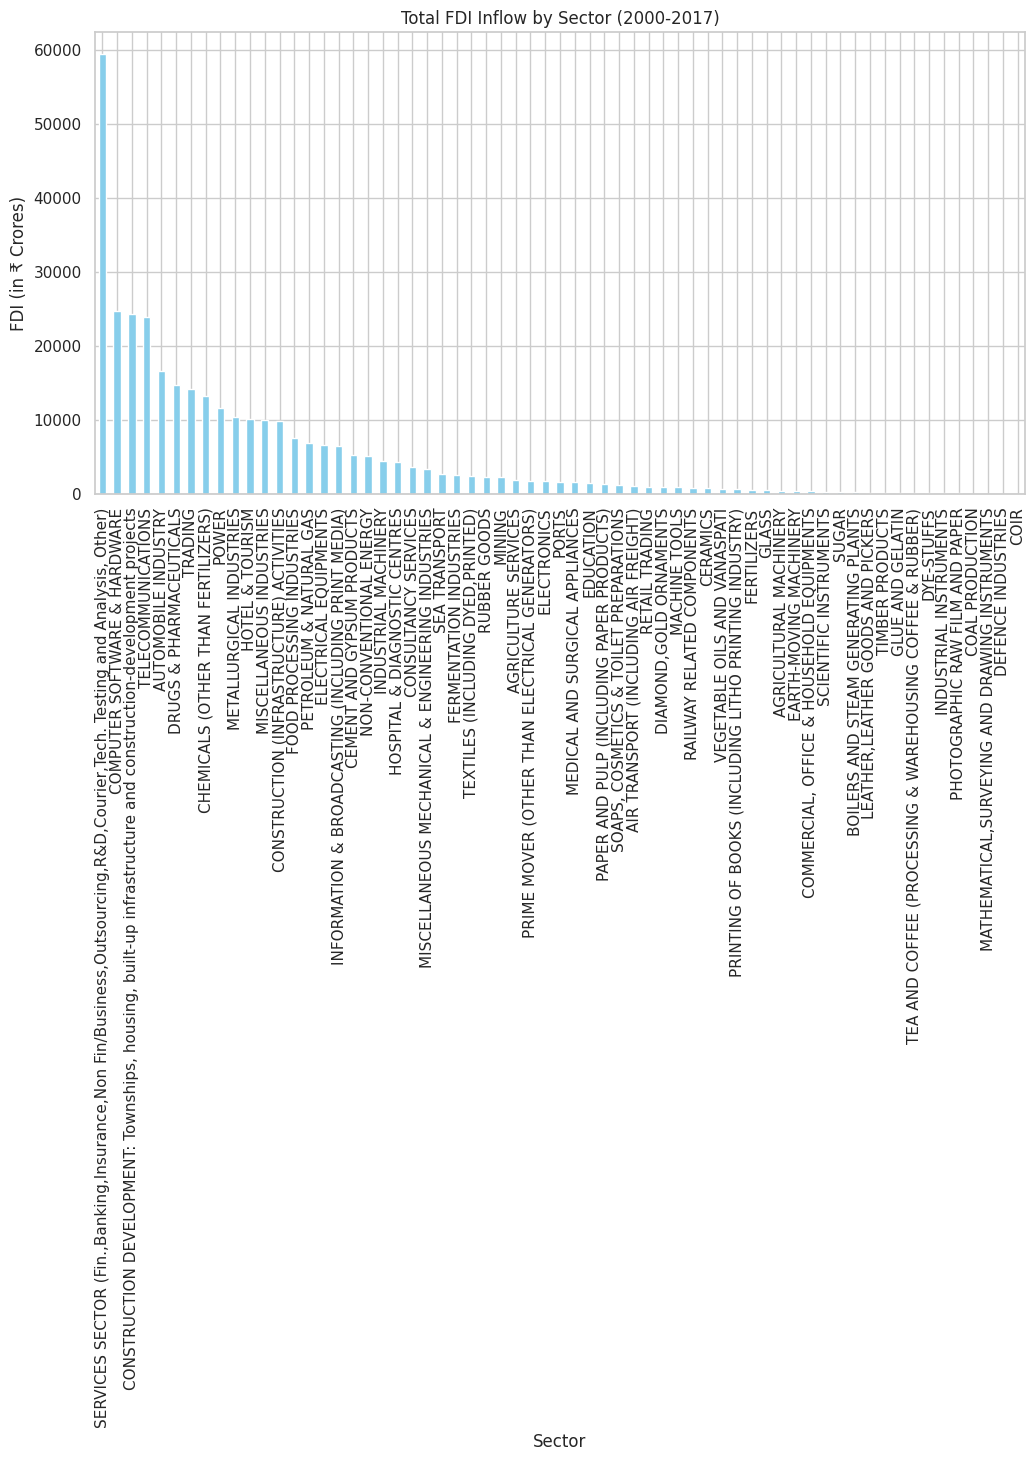

In [4]:
sector_total = df_melted.groupby('Sector')['FDI_Cr'].sum().sort_values(ascending=False)
sector_total.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Total FDI Inflow by Sector (2000-2017)")
plt.ylabel("FDI (in ₹ Crores)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This shows the top sectors receiving FDI over 17 years.

Identify which industries attract the most foreign interest.

2. Year-wise Total FDI Trend

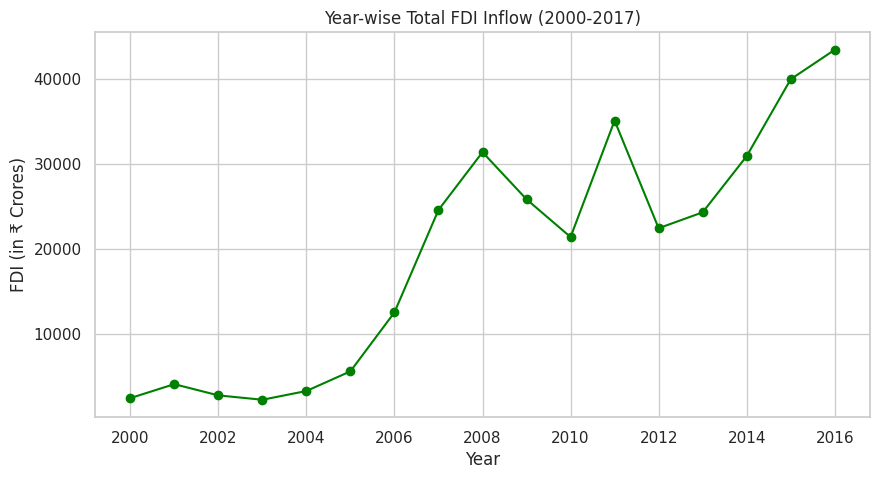

In [5]:
year_total = df_melted.groupby('Year')['FDI_Cr'].sum()
year_total.plot(marker='o', figsize=(10,5), color='green')
plt.title("Year-wise Total FDI Inflow (2000-2017)")
plt.ylabel("FDI (in ₹ Crores)")
plt.grid(True)
plt.show()

Shows FDI growth over time.

Look for dips or surges (e.g., policy changes, global events like 2008 crisis).

3. Top 5 Sectors – Trend Over Years


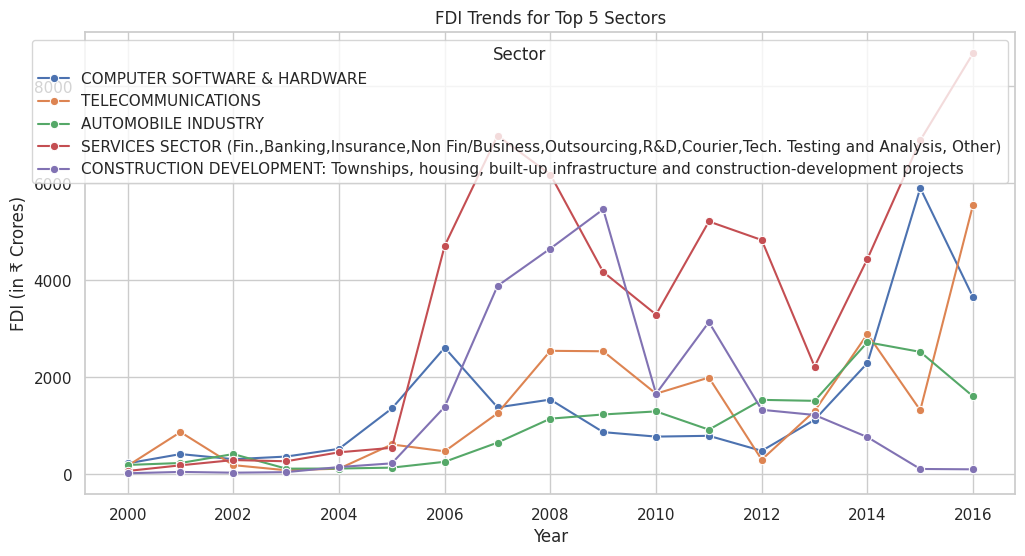

In [6]:
top5 = sector_total.head(5).index.tolist()
top5_data = df_melted[df_melted['Sector'].isin(top5)]

plt.figure(figsize=(12,6))
sns.lineplot(data=top5_data, x='Year', y='FDI_Cr', hue='Sector', marker='o')
plt.title("FDI Trends for Top 5 Sectors")
plt.ylabel("FDI (in ₹ Crores)")
plt.show()

Reveals how investment patterns evolve for leading sectors.

Spot consistency or sudden spikes.

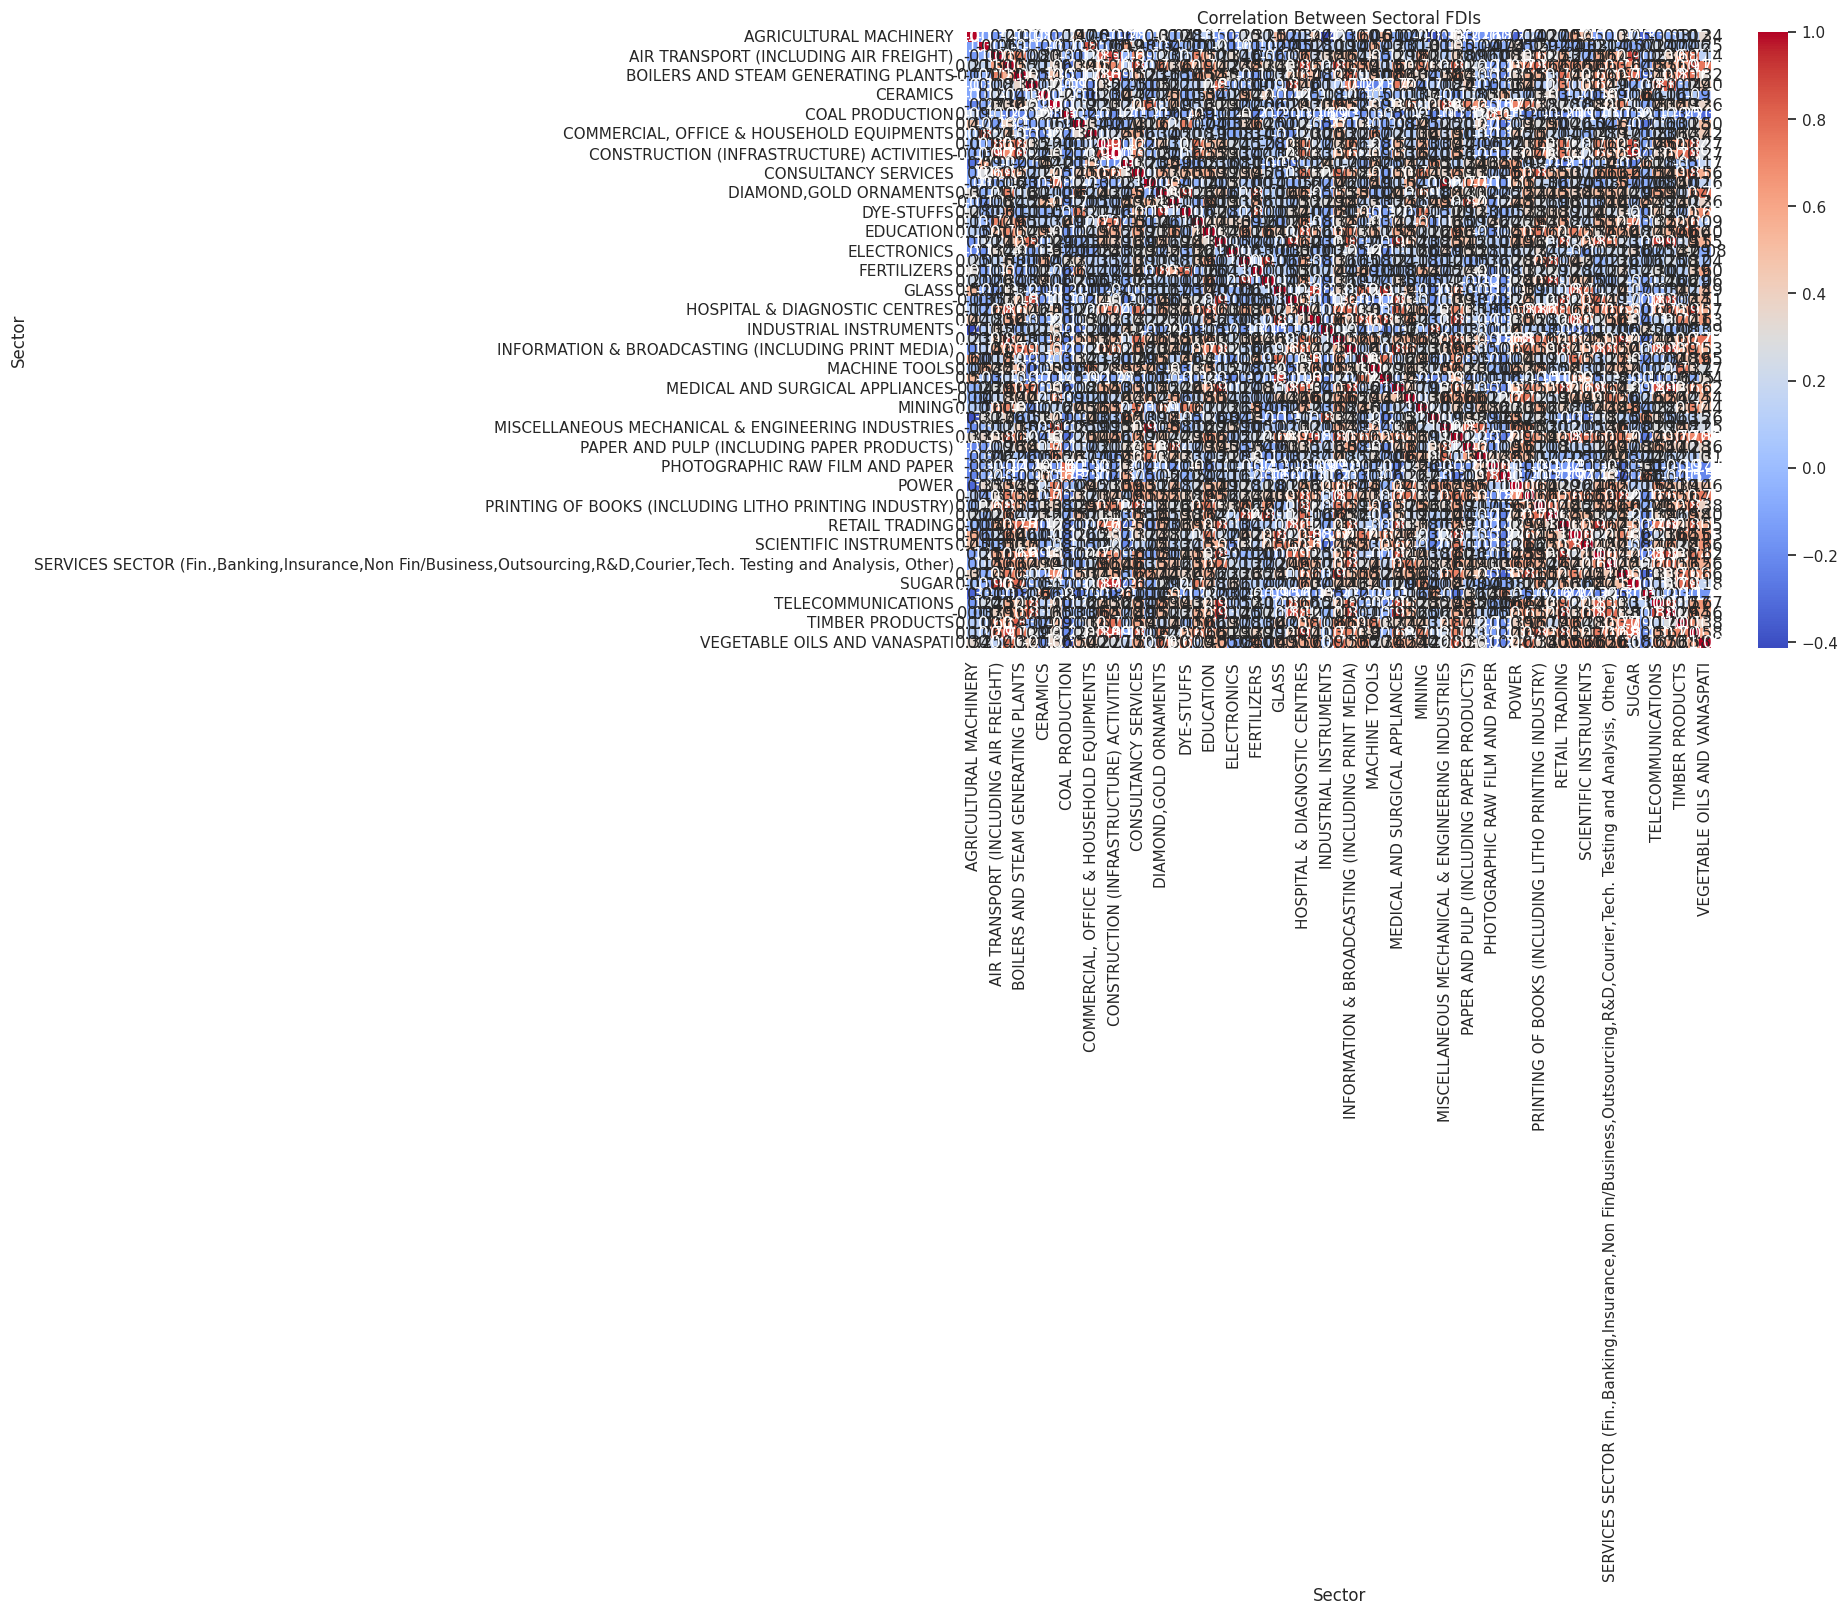

In [7]:
# Pivot to Year x Sector table (if needed)
pivot = df_melted.pivot_table(values='FDI_Cr', index='Year', columns='Sector')

# Correlation between sectors
correlation = pivot.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sectoral FDIs")
plt.show()

+1 (Red) → Strong positive correlation: both sectors rise/fall together.

-1 (Blue) → Strong negative correlation: one rises, the other falls.

0 (White) → No correlation: no consistent relationship.

Diagonal = 1: Every sector is perfectly correlated with itself.

/tmp/ipython-input-16-2849468008.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


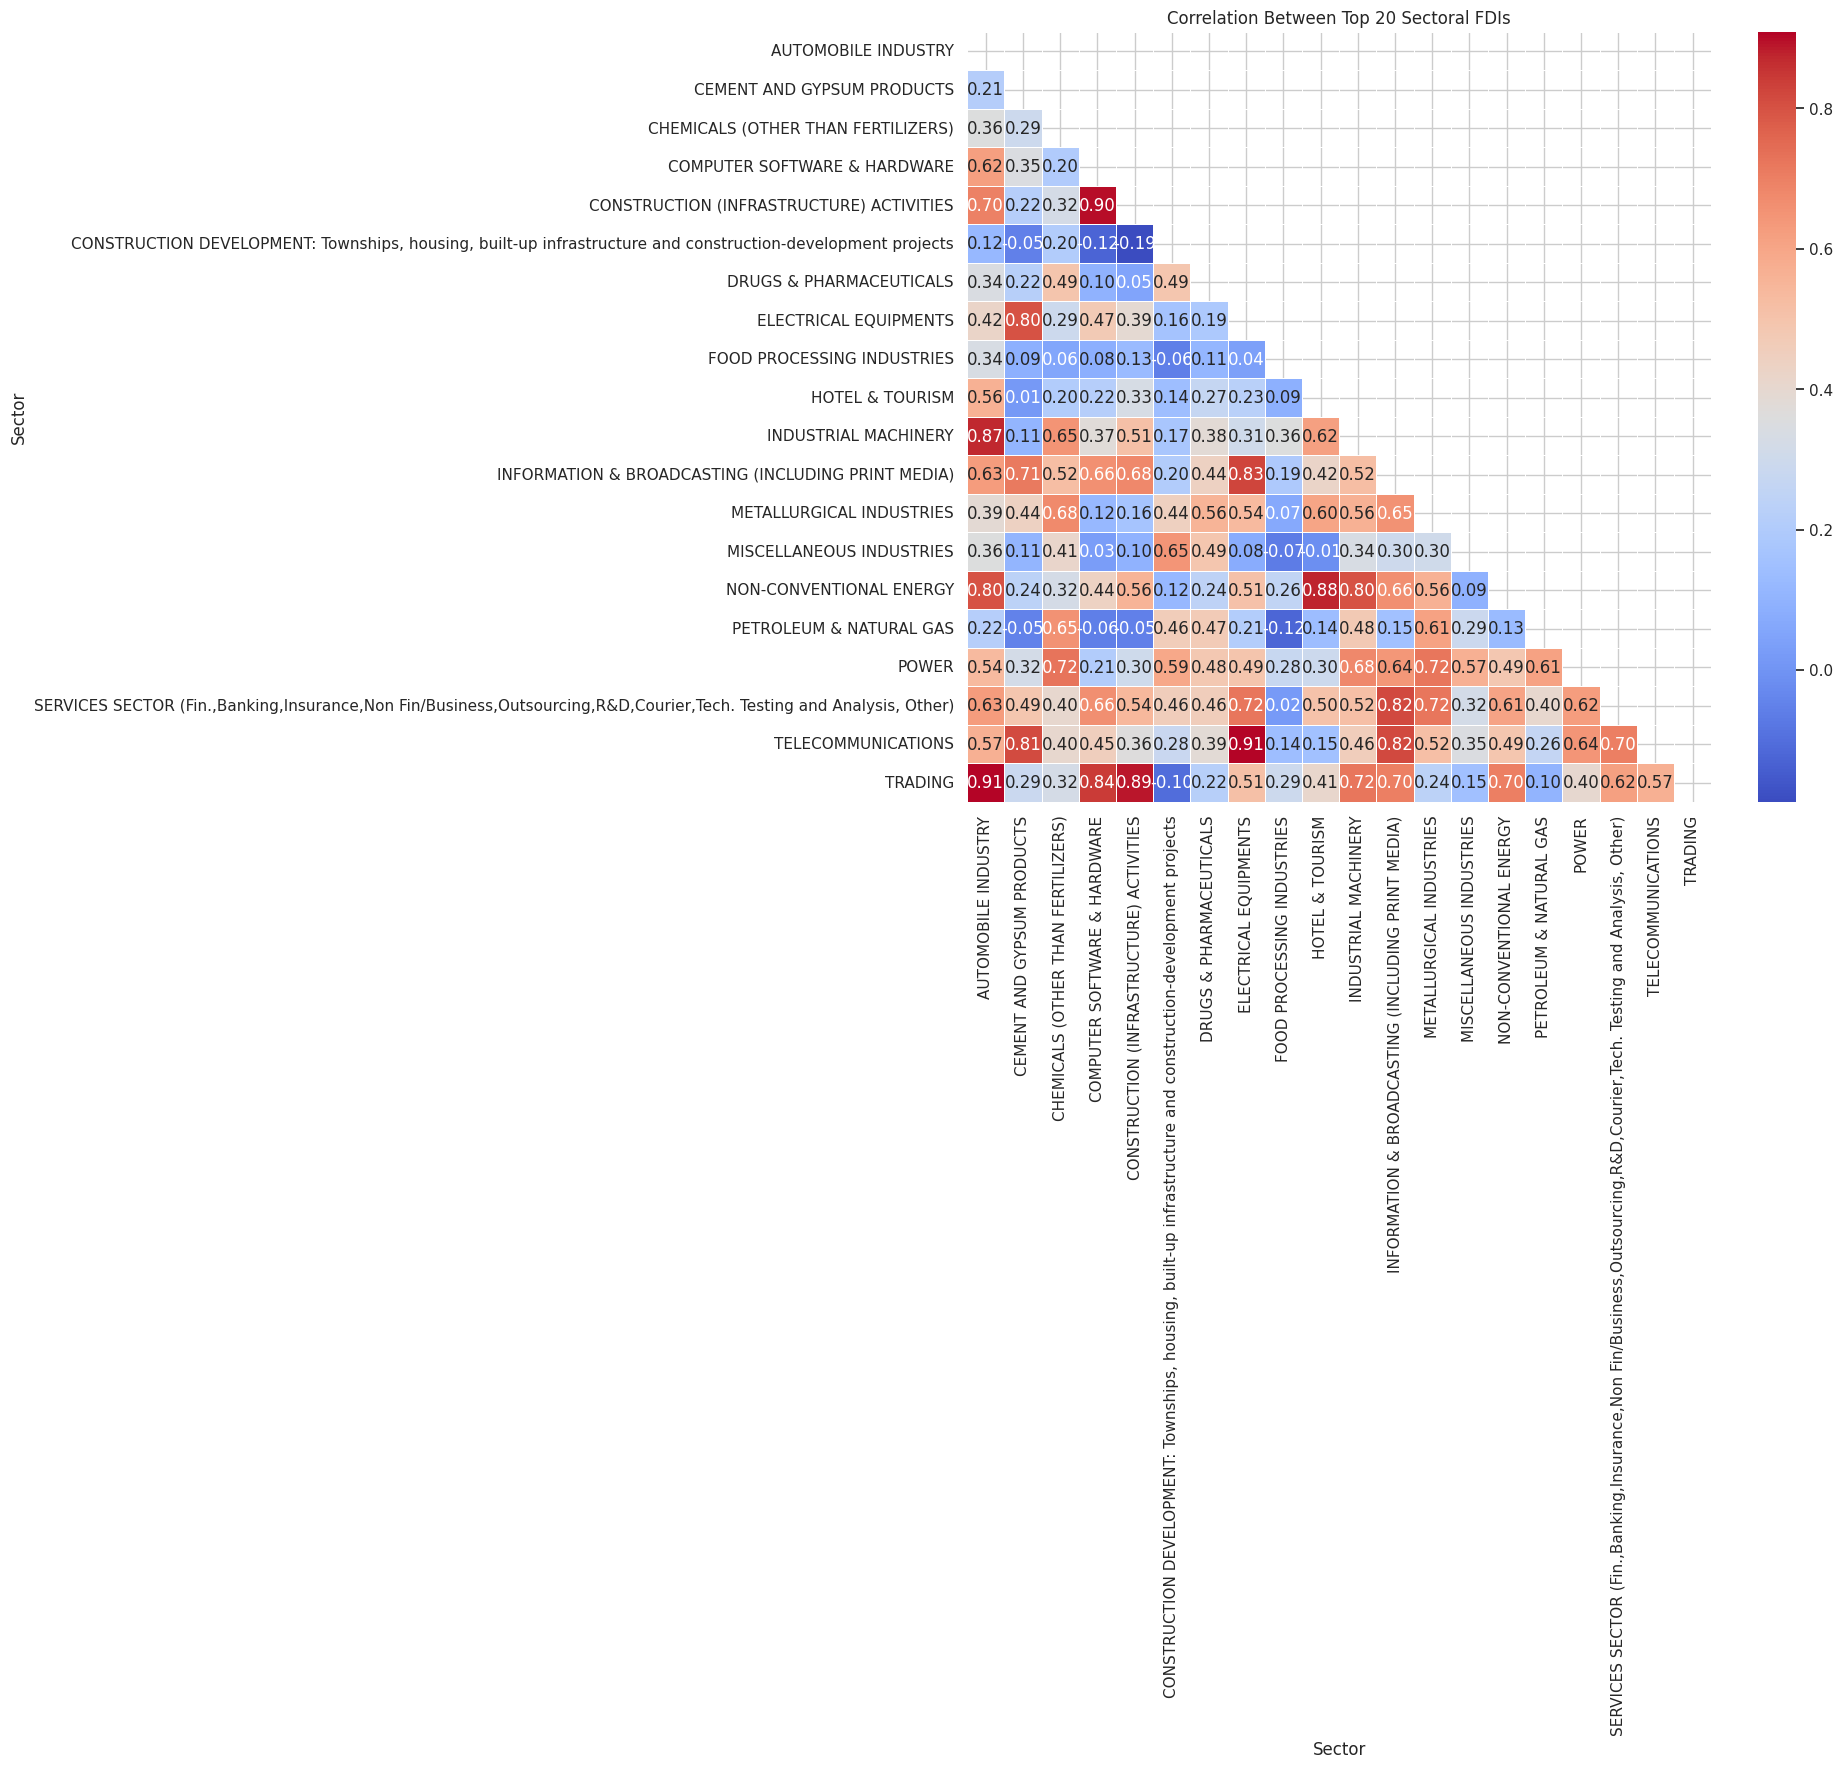

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Limit to top 20 sectors by total FDI
top_sectors = df_melted.groupby('Sector')['FDI_Cr'].sum().nlargest(20).index
pivot_top = df_melted[df_melted['Sector'].isin(top_sectors)].pivot_table(values='FDI_Cr', index='Year', columns='Sector')
corr_top = pivot_top.corr()

# Mask diagonal
mask = np.triu(np.ones_like(corr_top, dtype=bool))

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(corr_top, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Between Top 20 Sectoral FDIs")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation is a number between -1 and +1

Correlation Value	Meaning:

+1.0[red]	                Perfectly positively correlated (move together exactly)

+0.7 to +0.9[light red]	  Strong positive correlation

0[white]	                No correlation

-0.7 to -0.9[light blue]	Strong negative correlation (move in opposite ways)

-1.0[blue]	              Perfect opposite movement

It helps answer:

- Which sectors tend to grow together?

- Where can investors diversify their money?

- Are there clusters of sectors that respond to the same events?

